In [3]:
import glob 
import json

In [4]:
import pandas as pd

C:\Users\juan9\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
results_json = glob.glob("**.json")
results_json

['results_GMM.json',
 'results_GMM_science.json',
 'results_KM.json',
 'results_KM_scientific.json',
 'results_tf_idf_GMM.json',
 'results_tf_idf_GMM_science.json',
 'results_tf_idf_KM.json',
 'results_tf_idf_KM_science.json']

In [6]:
stacked_results= list()
for filename in results_json:
    data = dict()
    with open(filename,'r') as r:
        data = json.load(r)
    data["experiment"] = filename.replace(".json","")
    stacked_results.append(data)
len(stacked_results)

8

In [7]:
import pandas as pd
stacked_results = pd.DataFrame(stacked_results)

In [8]:
stacked_results["dataset_length"] = stacked_results["dataset_length"].astype(str)
stacked_results["average_document_length"] = stacked_results["average_document_length"].astype(str)
stacked_results["vocab_size"] = stacked_results["vocab_size"].astype(str)

In [9]:
stacked_results

,coherence,top_tokens,spanish_coherence,spanish_top_tokens,diversity,spanish_diversity,average_matching,cla,dataset,embedding_method,model,dataset_length,average_document_length,vocab_size,experiment
0,0.083539,"[[european, group, party, include, mep, irish,...",0.061851,"[[grupo, europeo, partido, nombre, democrata, ...",0.540,0.425,1.0,0.318859,UN_100w,Pre-trained embeddings,GMM,19816,54.0,3996,results_GMM
1,0.091610,"[[pain, block, postoperative, surgery, cathete...",0.085146,"[[dolor, bloqueo, postoperatorio, anestesico, ...",0.640,0.655,1.0,0.152296,scientific_papers,Pre-trained embeddings,GMM,995,1006.0,47620,results_GMM_science
2,0.081882,"[[judge, law, university, court, european, gen...",0.058129,"[[juez, derecho, tribunal, general, universida...",0.535,0.400,1.0,0.336391,UN_100w,Pre-trained embeddings,KM,19816,54.0,3996,results_KM
3,0.085122,"[[infection, child, wound, drug, instrument, b...",0.092046,"[[the, diagnostico, enfermeria, dia, medicamen...",0.720,0.710,1.0,0.165685,scientific_papers,Pre-trained embeddings,KM,995,1006.0,47620,results_KM_scientific
4,0.090701,"[[group, european, behalf, party, include, mep...",0.076349,"[[grupo, europeo, nombre, partido, democrata, ...",0.540,0.465,1.0,0.301902,UN_100w,tf-idf,GMM,19816,54.0,3996,results_tf_idf_GMM
5,0.122911,"[[anesthesia, surgery, block, min, pressure, d...",0.116997,"[[anestesia, bloqueo, cirugia, dosis, intubaci...",0.785,0.775,1.0,0.162861,scientific_papers,tf-idf,GMM,995,1006.0,47620,results_tf_idf_GMM_science
6,0.118311,"[[water, cement, concrete, material, product, ...",0.111192,"[[agua, cemento, concreto, material, producto,...",0.770,0.770,1.0,0.155554,scientific_papers,tf-idf,KM,995,1006.0,47620,results_tf_idf_KM
7,0.094468,"[[european, council, community, commission, un...",0.071042,"[[europeo, comision, consejo, comunidad, union...",0.500,0.420,1.0,0.329481,UN_100w,tf-idf,KM,19816,54.0,3996,results_tf_idf_KM_science


## Coherence

In [10]:
import seaborn as sns
def bargraph_dimension_value(data,dimension,val):
    sns.barplot(data=data,x=dimension,y=val)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


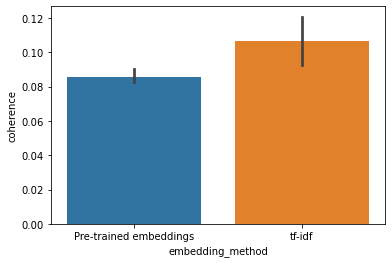

In [11]:
bargraph_dimension_value(stacked_results,"embedding_method","coherence")

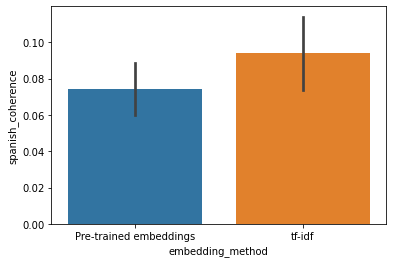

In [12]:
bargraph_dimension_value(stacked_results,"embedding_method","spanish_coherence")

We can observe that on average, tf-idf as an embedding method leads to better coherence. However, it's good to note that for this, tf-idf needs data from all language data, while pre-trained embeddings only use the english data for topic modelling.

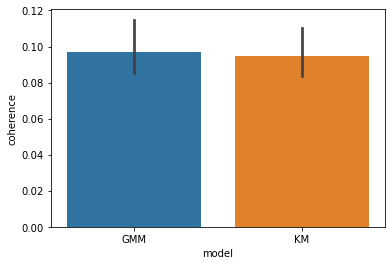

In [13]:
bargraph_dimension_value(stacked_results,"model","coherence")

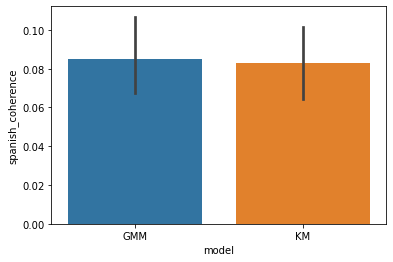

In [14]:
bargraph_dimension_value(stacked_results,"model","spanish_coherence")

The performance of a GMM vs a K-Means model is comparable, with GMM having a slightly higher edge on average.

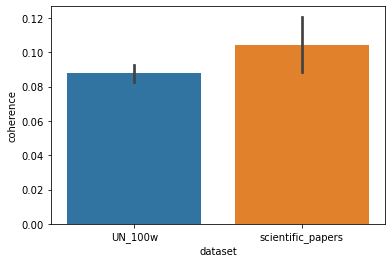

In [15]:
bargraph_dimension_value(stacked_results,"dataset","coherence")

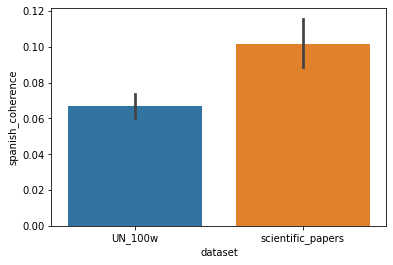

In [16]:
bargraph_dimension_value(stacked_results,"dataset","spanish_coherence")

The smaller dataset (with larger vocabulary and larger document length) received better coherence on average. It's also good to note that there's a considerable gap in coherence for the larger dataset between English and Spanish

## Diversity

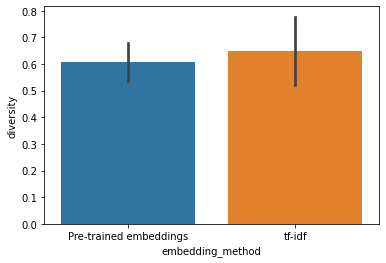

In [17]:
bargraph_dimension_value(stacked_results,"embedding_method","diversity")

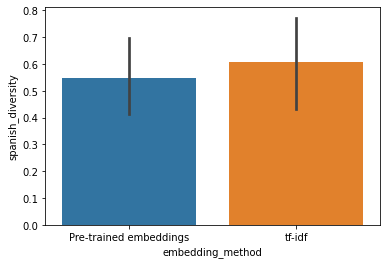

In [18]:
bargraph_dimension_value(stacked_results,"embedding_method","spanish_diversity")

Once again, TF-IDF leads to better results when it comes to diversity. Same weaknesses detailed above apply.

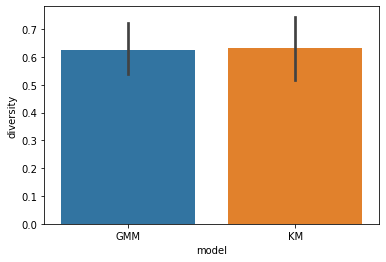

In [19]:
bargraph_dimension_value(stacked_results,"model","diversity")

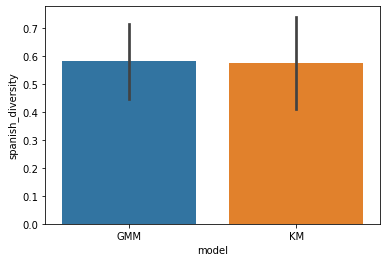

In [20]:
bargraph_dimension_value(stacked_results,"model","spanish_diversity")

On average, diversity is almost the same between a GMM and a K-Means Model.

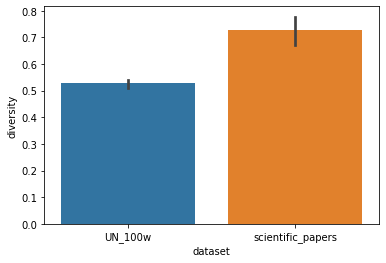

In [21]:
bargraph_dimension_value(stacked_results,"dataset","diversity")

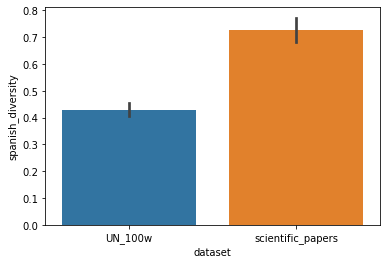

In [22]:
bargraph_dimension_value(stacked_results,"dataset","spanish_diversity")

Here we see a huge difference between the papers dataset and the UN dataset, with the papers dataset having a much higher diversity on average.

## Cross Lingual Alignment

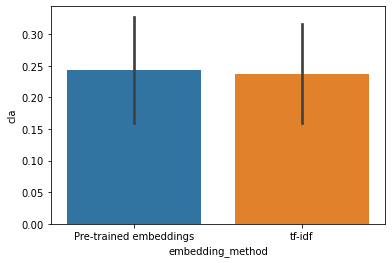

In [23]:
bargraph_dimension_value(stacked_results,"embedding_method","cla")

For Cross Lingual Alignment, pre-trained embeddings have a slight edge over tf-idf.

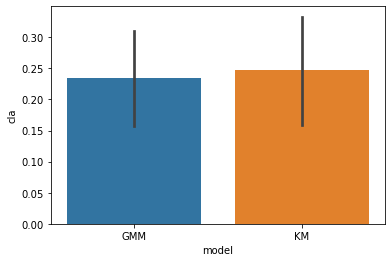

In [24]:
bargraph_dimension_value(stacked_results,"model","cla")

K-Means have a slightly higher edge over GMM when it comes to CLA

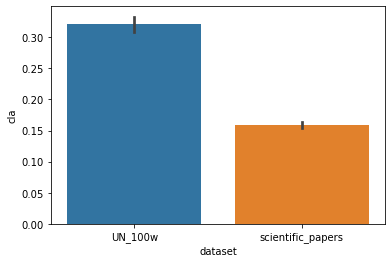

In [25]:
bargraph_dimension_value(stacked_results,"dataset","cla")

There is a huge difference in CLA between the UN and papers dataset. This makes sense, as this metric is dependent on the entities of the datasets, with UN having a smaller vocabulary but with more examples. 

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:

def compare_topics_languages(data,topic_number):
    english_text = " ".join(data["top_tokens"][topic_number])
    en_wordcloud = WordCloud(width=480, height=480).generate(english_text)

    spanish_text = " ".join(data["spanish_top_tokens"][topic_number])
    es_wordcloud = WordCloud(width=480, height=480).generate(spanish_text)

    rows = 1
    columns = 2

    fig = plt.figure(figsize=(10, 7)) 
    fig.add_subplot(rows, columns, 1) 
  
    # showing image 
    plt.imshow(en_wordcloud) 
    plt.axis('off') 
    plt.title("English Top Tokens")

    fig.add_subplot(rows, columns, 2) 
  
    plt.imshow(es_wordcloud) 
    plt.axis('off') 
    plt.title("Spanish Top Tokens")

    plt.show()

In [38]:
best_coherence = stacked_results.iloc[0]

In [39]:
best_coherence.to_frame()

,0
coherence,0.083539
top_tokens,"[[european, group, party, include, mep, irish,..."
spanish_coherence,0.061851
spanish_top_tokens,"[[grupo, europeo, partido, nombre, democrata, ..."
diversity,0.54
spanish_diversity,0.425
average_matching,1.0
cla,0.318859
dataset,UN_100w
embedding_method,Pre-trained embeddings


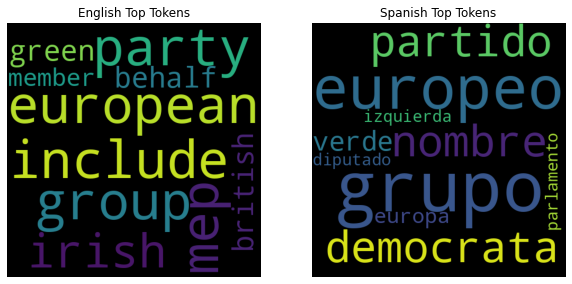

In [41]:
compare_topics_languages(best_coherence,0) 

By knowledge of both languages, we can indeed see that the top words from the topics are mostly the same! 